In [ ]:
# pip install plotly

In [1]:
import plotly.express as px

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [10]:
# Get the yield curve data
url = "https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2023"
table_list = pd.read_html(url)
yield_curve_data = table_list[0]

In [ ]:
yield_curve_data.columns

In [11]:
yield_curve_data.tail(1)

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
206,10/27/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.6,5.55,5.39,4.99,4.84,4.76,4.83,4.84,5.19,5.03


In [50]:
yield_curve_data.columns

Index(['Date', '20 YR', '30 YR', 'Extrapolation Factor',
       '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '17 WEEKS BANK DISCOUNT',
       'COUPON EQUIVALENT.1', '52 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT.2',
       '1 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr',
       '7 Yr', '10 Yr', '20 Yr', '30 Yr'],
      dtype='object')

In [22]:
# Extract the 'Date' and yield values for different maturities
dates = yield_curve_data['Date']
yields_1mo = yield_curve_data['1 Mo']
yields_2mo = yield_curve_data['2 Mo']
yields_3mo = yield_curve_data['3 Mo']
yields_4mo = yield_curve_data['4 Mo']
yields_6mo = yield_curve_data['6 Mo']
yields_1yr = yield_curve_data['1 Yr']
yields_2yr = yield_curve_data['2 Yr']
yields_3yr = yield_curve_data['3 Yr']
yields_5yr = yield_curve_data['5 Yr']
yields_7yr = yield_curve_data['7 Yr']
yields_10yr = yield_curve_data['10 Yr']
yields_20yr = yield_curve_data['20 Yr']
yields_30yr = yield_curve_data['30 Yr']

# Create a DataFrame for Plotly Express
yield_curve_df = pd.DataFrame({
    'Date': dates,
    '1-Month': yields_1mo,
    '2-Month': yields_2mo,
    '3-Month': yields_3mo,
    '4-Month': yields_4mo,
    '6-Month': yields_6mo,
    
    '1-Year': yields_1yr,
    '2-Year': yields_2yr,
    '3-Year': yields_3yr,
    '5-Year': yields_5yr,
    '7-Year': yields_7yr,
    '10-Year': yields_10yr,
    '20-Year': yields_20yr,
    '30-Year': yields_30yr
})

yield_curve_df['Date'] = pd.to_datetime(yield_curve_df['Date'], format='%m/%d/%Y')
yield_curve_df['Date'] = yield_curve_df['Date'].dt.date

# Use Plotly Express to create an interactive plot
fig = px.line(yield_curve_df, x='Date', y=yield_curve_df.columns[1:], labels={'value': 'Yield (%)'})
fig.update_layout(
    title='U.S. Treasury Yield Curve',
    xaxis_title='Date',
    yaxis_title='Yield (%)',
    legend_title='Maturity',
)

fig.show()

In [23]:
df = yield_curve_df.set_index("Date")

In [ ]:
yield_curve_df.tail(2)

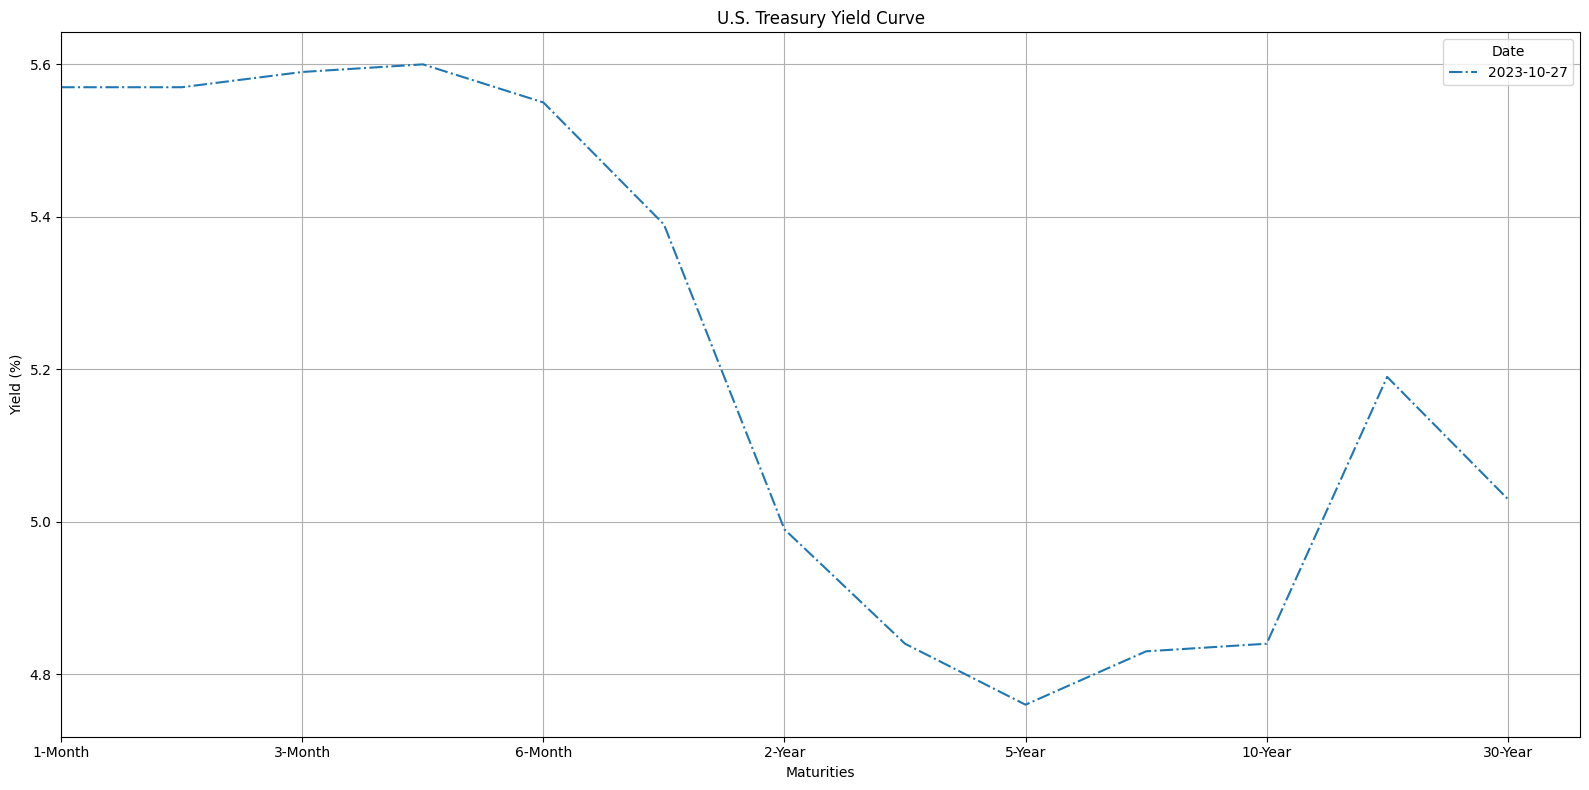

In [26]:
test = df.tail(1)
test.T.plot(figsize=(16,8), ls="-.", grid=True, title='U.S. Treasury Yield Curve',
    xlabel='Maturities',
    ylabel='Yield (%)')
plt.xlim(0);
plt.tight_layout()

## Compounding Interest

Amount at the end of deposit, A = $P[1+\frac{R_m}{m}]^{nm}$  --- (1)

For continuous compounding, A = $Pe^{R_c n}$  --- (2)  

Equating (1) and (2): $P[1+\frac{R_m}{m}]^{nm} = Pe^{R_c n}$  

$\implies R_c = mln[1+\frac{R_m}{m}] \hspace{0.3cm}$ and $\hspace{0.3cm} R_m = m[e^{\frac{R_c}{m}} - 1]$ 

In [ ]:
y = 0.0676

3*np.exp(-y*0.5) + 3*np.exp(-y*1) + 3*np.exp(-y*1.5) + 103*np.exp(-y*2)

In [ ]:
4.86 - 5.58 

In [ ]:
sofr = pd.read_csv("openbb_Secured_Overnight_Financing_Rate_(SOFR)_20231026_070826.csv", parse_dates=True, date_format="%Y-%m-%d %H:%M:%S")

In [ ]:
sofr['Date'] = pd.to_datetime(sofr['x'], format="%Y-%m-%dT%H:%M:%S")
sofr['Date'] = sofr['Date'].dt.date

In [ ]:
sofr.set_index("Date", inplace=True)

In [ ]:
sofr.drop(['x'], axis=1, inplace=True)

In [ ]:
sofr.tail()

In [ ]:
sofr.plot(figsize=(20,8));

### Continuous Discount Factor, $D(t,T) = e^{-R(t,T)(T-t)}$

## $\implies R(t,T) = -\frac{ln D(t,T)}{T-t}$, where R(t,T) is the continuously zero/spot rate 

In [202]:
# import yfinance as yf
# import pandas as pd

# # Define the bond symbol to maturity mapping
# bond_symbol_maturity_mapping = [
#     {"symbol": "BIL", "maturity": "1 Mo"},
#     {"symbol": "SHY", "maturity": "2 Mo"},
# #     {"symbol": "IRX", "maturity": "3 Mo"},
#     {"symbol": "MOS", "maturity": "4 Mo"},
# #     {"symbol": "SIXM", "maturity": "6 Mo"},
# #     {"symbol": "FUTYR", "maturity": "1 Yr"},
# #     {"symbol": "TUT", "maturity": "2 Yr"},
#     {"symbol": "THRR", "maturity": "3 Yr"},
# #     {"symbol": "FVX", "maturity": "5 Yr"},
# #     {"symbol": "IR7T", "maturity": "7 Yr"},
# #     {"symbol": "TNX", "maturity": "10 Yr"},
# #     {"symbol": "TYX", "maturity": "20 Yr"},
# #     {"symbol": "US30YR", "maturity": "30 Yr"},
# ]

# # Create an empty list to store bond prices
# bond_prices = []

# # Loop through the mapping and retrieve bond prices
# for bond in bond_symbol_maturity_mapping:
#     symbol = bond["symbol"]
#     maturity = bond["maturity"]
    
#     # Create a Yahoo Finance Ticker object for the Treasury bond
#     bond_ticker = yf.Ticker(symbol)
    
#     # Get the bond's historical market data for a specific period
#     bond_data = bond_ticker.history(period="1d")
    
#     # Extract the market price (closing price) from the data
#     bond_price = bond_data['Close'][0]
    
#     # Append the bond's symbol, maturity, and price to the list
#     bond_prices.append({"Symbol": symbol, "Maturity": maturity, "Price": bond_price})

# # Create a DataFrame from the list of bond prices
# bond_prices_df = pd.DataFrame(bond_prices)

# # Print the DataFrame with bond prices
# print(bond_prices_df)


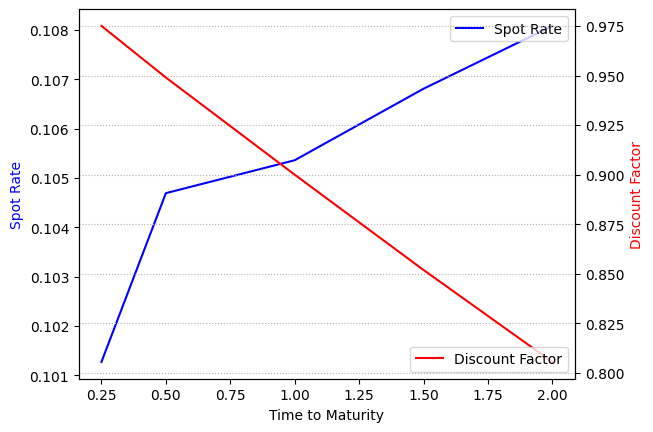

In [70]:
zero_curve = pd.DataFrame({"Maturity": [0.25, 0.5, 1, 1.5, 2],
                          "Discount Factor": [0.975, 0.949, 0.9, 0.85196, 0.8056]
                          })
zero_curve["Spot Rate"] = -np.log(zero_curve["Discount Factor"])/zero_curve["Maturity"]


# Create a figure and the first axis
fig, ax1 = plt.subplots()

# Plot the first set of data on the first axis
ax1.plot(zero_curve["Maturity"], zero_curve["Spot Rate"], label='Spot Rate', color='blue')
ax1.set_ylabel('Spot Rate', color='blue')
ax1.set_xlabel('Time to Maturity', color='Black')

# Create a second axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the second set of data on the second axis
ax2.plot(zero_curve["Maturity"], zero_curve["Discount Factor"], label='Discount Factor', color='red')
ax2.set_ylabel('Discount Factor', color='red')

# Add a legend
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

# Display the plot
plt.grid(True, ls=":")
plt.show()

$(1 + r_d)^T = FX_T \cdot \frac{1}{FX_0} \cdot (1 + r_f)^T$ 

$\implies FX_T = FX_0 \cdot (\frac{1 + r_d}{1 + r_f})^T \hspace{0.3cm}$ OR $\hspace{0.3cm} r_d = [\frac{FX_T}{FX_0} \cdot (1 + r_f)^T]^\frac{1}{T} - 1 = [\frac{FX_T}{FX_0}]^\frac{1}{T} \cdot (1 + r_f) - 1$

#### LIBOR rate != Zero rate

### L(0, 1y) $\neq$ R(0, 1y) 

L(0, 1y) $= \frac{1}{\Delta 1y} \cdot \frac{D(0,0) - D(0,1y)}{D(0,1y)} \equiv \frac{1 - D(0,1y)}{D(0,1y)}$

#### Forward Rate

### $R_F = \frac{R_i T_i - R_{i-1} T_{i-1}}{T_i - T_{i-1}} \hspace{0.3cm} \equiv \hspace{0.3cm} R_i = \frac {R_F(T_i - T_{i-1}) +  R_{i-1} T_{i-1} }{T_i}$

### Duration Model

### $D = \sum_{i=1}^n t_i \cdot \frac{c_ie^{-yt_i}}{B}$

## $\Delta B = -D \cdot B \cdot \Delta y \hspace{0.3cm}$ or $\hspace{0.3cm} \frac{\Delta B}{B} = -D \cdot \Delta y$

where  
- D is the modified duration of the portfolio  
- $\Delta y$ is the parallel shift in 1 day

$\Delta B = - \frac{D \cdot B \cdot \Delta y}{1+\frac{y}{m}} $ where m is the compounding frequency.  

### $\implies \Delta B = -B \cdot D^* \cdot \Delta y$